# PROJECTE FINAL - Qualitat de l'aire de Barcelona (gener 2023)
Estudi de la qualitat de l'aire de Barcelona usant un conjunt de dades del gener de 2023

In [1]:
# Llibreries
# ==========
import os
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer   

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## 1.- Lectura de dades d'un arxiu CSV

In [2]:
filePath = r"C:\Users\User\Downloads" + os.sep
file = filePath + "2023_01_Gener_qualitat_aire_BCN.csv"
dfAir = pd.read_csv(file) 
dfAir.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2023,1,1,24.0,...,37.0,V,51.0,V,54.0,V,40.0,V,26.0,V
1,8,Barcelona,19,Barcelona,4,7,2023,1,2,12.0,...,22.0,V,29.0,V,26.0,V,97.0,V,65.0,V
2,8,Barcelona,19,Barcelona,4,7,2023,1,3,68.0,...,6.0,V,3.0,V,2.0,V,2.0,V,1.0,V
3,8,Barcelona,19,Barcelona,4,7,2023,1,4,1.0,...,26.0,V,69.0,V,36.0,V,16.0,V,22.0,V
4,8,Barcelona,19,Barcelona,4,7,2023,1,5,22.0,...,6.0,V,33.0,V,73.0,V,13.0,V,7.0,V


In [3]:
 #Canvi de configuració per visualitzar totes les columnes i files
pd.set_option("display.max.columns", None)  
pd.set_option('display.max.rows', 80)

In [4]:
dfAir.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2023,1,1,24.0,V,28.0,V,20.0,V,9.0,V,13.0,V,14.0,V,7.0,V,10.0,V,5.0,V,10.0,V,11.0,V,12.0,V,11.0,V,5.0,V,7.0,V,3.0,V,2.0,V,3.0,V,5.0,V,37.0,V,51.0,V,54.0,V,40.0,V,26.0,V
1,8,Barcelona,19,Barcelona,4,7,2023,1,2,12.0,V,13.0,V,13.0,V,9.0,V,5.0,V,7.0,V,11.0,V,31.0,V,56.0,V,61.0,V,41.0,V,50.0,V,48.0,V,46.0,V,48.0,V,31.0,V,23.0,V,12.0,V,15.0,V,22.0,V,29.0,V,26.0,V,97.0,V,65.0,V
2,8,Barcelona,19,Barcelona,4,7,2023,1,3,68.0,V,31.0,V,31.0,V,24.0,V,20.0,V,16.0,V,26.0,V,51.0,V,63.0,V,67.0,V,64.0,V,79.0,V,66.0,V,43.0,V,NaN,N,NaN,N,11.0,V,6.0,V,19.0,V,6.0,V,3.0,V,2.0,V,2.0,V,1.0,V
3,8,Barcelona,19,Barcelona,4,7,2023,1,4,1.0,V,1.0,V,1.0,V,2.0,V,3.0,V,7.0,V,16.0,V,33.0,V,54.0,V,72.0,V,46.0,V,33.0,V,18.0,V,14.0,V,12.0,V,12.0,V,16.0,V,17.0,V,16.0,V,26.0,V,69.0,V,36.0,V,16.0,V,22.0,V
4,8,Barcelona,19,Barcelona,4,7,2023,1,5,22.0,V,9.0,V,5.0,V,4.0,V,8.0,V,6.0,V,11.0,V,36.0,V,52.0,V,84.0,V,88.0,V,55.0,V,26.0,V,23.0,V,24.0,V,19.0,V,6.0,V,3.0,V,2.0,V,6.0,V,33.0,V,73.0,V,13.0,V,7.0,V


In [5]:
dfAir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODI_PROVINCIA    2015 non-null   int64  
 1   PROVINCIA         2015 non-null   object 
 2   CODI_MUNICIPI     2015 non-null   int64  
 3   MUNICIPI          2015 non-null   object 
 4   ESTACIO           2015 non-null   int64  
 5   CODI_CONTAMINANT  2015 non-null   int64  
 6   ANY               2015 non-null   int64  
 7   MES               2015 non-null   int64  
 8   DIA               2015 non-null   int64  
 9   H01               1952 non-null   float64
 10  V01               2015 non-null   object 
 11  H02               1998 non-null   float64
 12  V02               2015 non-null   object 
 13  H03               1998 non-null   float64
 14  V03               2015 non-null   object 
 15  H04               1998 non-null   float64
 16  V04               2015 non-null   object 


### Llista i codis dels contaminants de la qualitat de l'aire
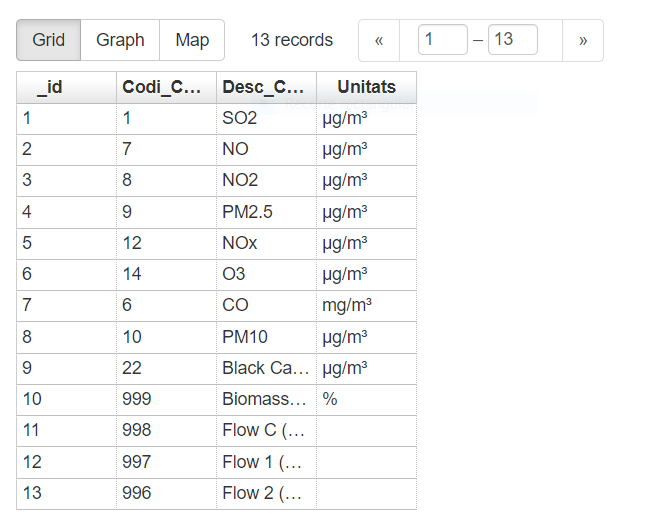

In [6]:
filePath = r"C:\Users\User\Downloads" + os.sep
file = filePath + "qualitat_aire_contaminants.csv"
dfPollutant = pd.read_csv(file, index_col="Codi_Contaminant")
dfPollutant

,Desc_Contaminant,Unitats
Codi_Contaminant,,
1,SO2,µg/m³
7,NO,µg/m³
8,NO2,µg/m³
9,PM2.5,µg/m³
12,NOx,µg/m³
14,O3,µg/m³
6,CO,mg/m³
10,PM10,µg/m³
22,Black Carbon,µg/m³


In [7]:
dfPollutant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1 to 996
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Desc_Contaminant  13 non-null     object
 1   Unitats           11 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


### Llista i codis de les estacions de mesura de la qualitat d'aire

In [8]:
filePath = r"C:\Users\User\Downloads" + os.sep
file = filePath + "2022_qualitat_aire_estacions.csv"
dfStations = pd.read_csv(file)
dfStations.head(10)

,Estacio,nom_cabina,codi_dtes,zqa,codi_eoi,Longitud,Latitud,ubicacio,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Clas_1,Clas_2,Codi_Contaminant
0,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,8
1,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,14
2,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,7
3,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,12
4,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,8
5,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,14
6,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,10
7,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,1
8,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,6
9,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,7


El codis de les estacions que usaré són els de la columna 'Estacio'

In [9]:
# Codi de les estacions de mesura de qualitat de l'aire
dfStationsMn = dfStations[['Estacio', 'nom_cabina', 'ubicacio', 'Nom_barri', 'Codi_Contaminant']]
dfStationsMn

,Estacio,nom_cabina,ubicacio,Nom_barri,Codi_Contaminant
0,50,Barcelona - Ciutadella,Parc de la Ciutadella,"Sant Pere, Santa Caterina i la Ribera",8
1,50,Barcelona - Ciutadella,Parc de la Ciutadella,"Sant Pere, Santa Caterina i la Ribera",14
2,50,Barcelona - Ciutadella,Parc de la Ciutadella,"Sant Pere, Santa Caterina i la Ribera",7
3,50,Barcelona - Ciutadella,Parc de la Ciutadella,"Sant Pere, Santa Caterina i la Ribera",12
4,43,Barcelona - Eixample,Av. Roma - c/ Comte Urgell,la Nova Esquerra de l'Eixample,8
5,43,Barcelona - Eixample,Av. Roma - c/ Comte Urgell,la Nova Esquerra de l'Eixample,14
6,43,Barcelona - Eixample,Av. Roma - c/ Comte Urgell,la Nova Esquerra de l'Eixample,10
7,43,Barcelona - Eixample,Av. Roma - c/ Comte Urgell,la Nova Esquerra de l'Eixample,1
8,43,Barcelona - Eixample,Av. Roma - c/ Comte Urgell,la Nova Esquerra de l'Eixample,6
9,43,Barcelona - Eixample,Av. Roma - c/ Comte Urgell,la Nova Esquerra de l'Eixample,7


In [10]:
dfGroups = dfStationsMn.groupby('Estacio')
dfGroups

In [11]:
dfCount = dfGroups.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
#dfCount

nameStation = ['Barcelona Poblenou', 'Barcelona Sants', 'Barcelona Eixample', 'Barcelona Gràcia', 'Barcelona Ciutadella',
                 'Barcelona Vall Hebron', 'Barcelona Palau Reial', 'Barcelona Observatori Fabra']
dfCount['nom_estacio'] = nameStation
dfCount[['nom_estacio']]

,nom_estacio
Estacio,
4,Barcelona Poblenou
42,Barcelona Sants
43,Barcelona Eixample
44,Barcelona Gràcia
50,Barcelona Ciutadella
54,Barcelona Vall Hebron
57,Barcelona Palau Reial
58,Barcelona Observatori Fabra


## 2.- Preprocessament de les dades de dataframe dfAir

In [90]:
dfAir.columns = [col.lower() for col in dfAir]
dfAir.columns

Index(['codi_provincia', 'provincia', 'codi_municipi', 'municipi', 'estacio',
       'codi_contaminant', 'any', 'mes', 'dia', 'h01', 'v01', 'h02', 'v02',
       'h03', 'v03', 'h04', 'v04', 'h05', 'v05', 'h06', 'v06', 'h07', 'v07',
       'h08', 'v08', 'h09', 'v09', 'h10', 'v10', 'h11', 'v11', 'h12', 'v12',
       'h13', 'v13', 'h14', 'v14', 'h15', 'v15', 'h16', 'v16', 'h17', 'v17',
       'h18', 'v18', 'h19', 'v19', 'h20', 'v20', 'h21', 'v21', 'h22', 'v22',
       'h23', 'v23', 'h24', 'v24'],
      dtype='object')

In [91]:
# Selecciono les columnes rellevants de dfAir
dfAirMin = dfAir[['estacio', 'codi_contaminant', 'dia', 'h02', 'h04', 'h06', 'h08', 'h10',
                  'h12', 'h14', 'h16', 'h18', 'h20', 'h22', 'h24']]
dfAirMin

,estacio,codi_contaminant,dia,h02,h04,h06,h08,h10,h12,h14,h16,h18,h20,h22,h24
0,4,7,1,28.0,9.0,14.0,10.0,10.0,12.0,5.0,3.0,3.0,37.0,54.0,26.0
1,4,7,2,13.0,9.0,7.0,31.0,61.0,50.0,46.0,31.0,12.0,22.0,26.0,65.0
2,4,7,3,31.0,24.0,16.0,51.0,67.0,79.0,43.0,NaN,6.0,6.0,2.0,1.0
3,4,7,4,1.0,2.0,7.0,33.0,72.0,33.0,14.0,12.0,17.0,26.0,36.0,22.0
4,4,7,5,9.0,4.0,6.0,36.0,84.0,55.0,23.0,19.0,3.0,6.0,73.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,58,14,27,70.0,67.0,56.0,62.0,57.0,60.0,52.0,57.0,65.0,67.0,77.0,42.0
2011,58,14,28,55.0,54.0,54.0,57.0,54.0,60.0,56.0,50.0,57.0,48.0,57.0,59.0
2012,58,14,29,54.0,56.0,44.0,51.0,55.0,57.0,67.0,56.0,53.0,63.0,58.0,62.0
2013,58,14,30,62.0,58.0,56.0,59.0,60.0,59.0,62.0,70.0,64.0,59.0,67.0,66.0


In [15]:
dfAirMin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   estacio           2015 non-null   int64  
 1   codi_contaminant  2015 non-null   int64  
 2   dia               2015 non-null   int64  
 3   h02               1998 non-null   float64
 4   h04               1998 non-null   float64
 5   h06               1998 non-null   float64
 6   h08               1998 non-null   float64
 7   h10               1969 non-null   float64
 8   h12               1926 non-null   float64
 9   h14               1944 non-null   float64
 10  h16               1964 non-null   float64
 11  h18               2002 non-null   float64
 12  h20               2004 non-null   float64
 13  h22               2003 non-null   float64
 14  h24               2002 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 236.3 KB


In [16]:
dfAirMin.isnull().sum()  

estacio              0
codi_contaminant     0
dia                  0
h02                 17
h04                 17
h06                 17
h08                 17
h10                 46
h12                 89
h14                 71
h16                 51
h18                 13
h20                 11
h22                 12
h24                 13
dtype: int64

In [17]:
# Imputació dels valors nuls amb el valor de la mitjana
#from sklearn.impute import SimpleImputer   -> Està a l'inici en llibreries
simple = SimpleImputer().fit(dfAirMin)
mean = simple.transform(dfAirMin)    # És un array

dfAirMin = pd.DataFrame(mean, columns=['estacio', 'codi_contaminant', 'dia', 'h02', 'h04', 'h06', 'h08', 'h10',
                  'h12', 'h14', 'h16', 'h18', 'h20', 'h22', 'h24'])
dfAirMin.isnull().sum()  

estacio             0
codi_contaminant    0
dia                 0
h02                 0
h04                 0
h06                 0
h08                 0
h10                 0
h12                 0
h14                 0
h16                 0
h18                 0
h20                 0
h22                 0
h24                 0
dtype: int64

## 3.- Anàlisi estadístic de les concentracions 

In [18]:
dfAirMin.head()  

,estacio,codi_contaminant,dia,h02,h04,h06,h08,h10,h12,h14,h16,h18,h20,h22,h24
0,4.0,7.0,1.0,28.0,9.0,14.0,10.0,10.0,12.0,5.0,3.000000,3.0,37.0,54.0,26.0
1,4.0,7.0,2.0,13.0,9.0,7.0,31.0,61.0,50.0,46.0,31.000000,12.0,22.0,26.0,65.0
2,4.0,7.0,3.0,31.0,24.0,16.0,51.0,67.0,79.0,43.0,367.122108,6.0,6.0,2.0,1.0
3,4.0,7.0,4.0,1.0,2.0,7.0,33.0,72.0,33.0,14.0,12.000000,17.0,26.0,36.0,22.0
4,4.0,7.0,5.0,9.0,4.0,6.0,36.0,84.0,55.0,23.0,19.000000,3.0,6.0,73.0,7.0


In [19]:
# Càlcul de la concentració mitjana de cada contaminant al gener 2023

def calculateValue (codi_contaminant):
    rowPMean = np.mean(dfAirMin[dfAirMin['codi_contaminant'] == codi_contaminant].iloc[:,3:].mean())
    print('El valor promig del contaminant',codi_contaminant,'al gener:', round(rowPMean, 2), 'μg/m^3')

calculateValue(1)    # S02
calculateValue(6)    # CO  
calculateValue(7)    # NO
calculateValue(8)    # NO2
calculateValue(9)    # PM2.5
calculateValue(10)   # PM10
calculateValue(12)   # NOx
calculateValue(14)   # O3
calculateValue(22)   # Black Carbon
calculateValue(999)  # Biomassa Black Carbon, en %

El valor promig del contaminant 1 al gener: 5.61 μg/m^3
El valor promig del contaminant 6 al gener: 3.77 μg/m^3
El valor promig del contaminant 7 al gener: 14.5 μg/m^3
El valor promig del contaminant 8 al gener: 31.04 μg/m^3
El valor promig del contaminant 9 al gener: 10.58 μg/m^3
El valor promig del contaminant 10 al gener: 40.77 μg/m^3
El valor promig del contaminant 12 al gener: 44.18 μg/m^3
El valor promig del contaminant 14 al gener: 44.49 μg/m^3
El valor promig del contaminant 22 al gener: 1388.22 μg/m^3
El valor promig del contaminant 999 al gener: 26.1 μg/m^3


Els tres contaminants amb un valor de concentració promig al gener 2023 més elevat són: black carbon, O3 i NOx. 

In [20]:
# Càlcul del valor promig de concentració de cada contaminant per estació al gener 2023
def selectRows (numberPoll, numberStation):
    # Selecció de files corresponents
    filter = (dfAirMin['codi_contaminant'] == numberPoll) & (dfAirMin['estacio'] == numberStation)
    rowsFilter = dfAirMin.loc[filter]
    columnsH = rowsFilter.iloc[:,3:]
    # Calcul de la mitja de cada fila seleccionada
    meansPollStation = columnsH.mean(axis=1)
    #print("Contaminant", numberPoll, "a estació", numberStation, ":\n", meansPollStation)
    # Càlcul de la mitjana total
    totalMean = meansPollStation.mean()
    print('Contaminant', numberPoll, 'a estació', numberStation, '=', round(totalMean,2), 'μg/m^3')
    
# Concentració de SO2 (1) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 1    #Com que calcula el cont 1 si no hi ha estacio 43
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsPol = dfPollutant.groupby('estacio')
dfGroupsPol
dfCount = dfGroupsPol.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant']  

estacio
43.0    31
44.0    31
54.0    31
57.0    31
Name: codi_contaminant, dtype: int64

In [21]:
print('Les concentracions mitjanes de SO2 a les estacions són:')
selectRows (1, 43)  
selectRows (1, 44)
selectRows (1, 54)
selectRows (1, 57)

Les concentracions mitjanes de SO2 a les estacions són:
Contaminant 1 a estació 43 = 4.4 μg/m^3
Contaminant 1 a estació 44 = 6.16 μg/m^3
Contaminant 1 a estació 54 = 7.37 μg/m^3
Contaminant 1 a estació 57 = 4.51 μg/m^3


In [22]:
# Concentració de CO (6) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 6    #Com que calcula el cont 22 si no hi ha estacio 43
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsPol = dfPollutant.groupby('estacio')
dfGroupsPol
dfCount = dfGroupsPol.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant']  

estacio
43.0    31
44.0    31
54.0    31
57.0    31
Name: codi_contaminant, dtype: int64

In [23]:
print('Les concentracions mitjanes de CO a les estacions són:')
selectRows (6, 43)  
selectRows (6, 44)
selectRows (6, 54)
selectRows (6, 57)

Les concentracions mitjanes de CO a les estacions són:
Contaminant 6 a estació 43 = 2.31 μg/m^3
Contaminant 6 a estació 44 = 4.3 μg/m^3
Contaminant 6 a estació 54 = 5.18 μg/m^3
Contaminant 6 a estació 57 = 3.29 μg/m^3


In [24]:
# Concentració de NO (7) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 7   #Com que calcula el cont 22 si no hi ha estacio 43
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsPol = dfPollutant.groupby('estacio')
dfGroupsPol
dfCount = dfGroupsPol.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant']  

estacio
4.0     31
42.0    31
43.0    31
44.0    31
50.0    31
54.0    31
57.0    31
58.0    31
Name: codi_contaminant, dtype: int64

In [25]:
print('Les concentracions mitjanes de NO a les estacions són:')
selectRows (7, 4)  
selectRows (7, 42)
selectRows (7, 43)
selectRows (7, 44)
selectRows (7, 50)  
selectRows (7, 54)
selectRows (7, 57)
selectRows (7, 58)

Les concentracions mitjanes de NO a les estacions són:
Contaminant 7 a estació 4 = 16.48 μg/m^3
Contaminant 7 a estació 42 = 10.43 μg/m^3
Contaminant 7 a estació 43 = 37.35 μg/m^3
Contaminant 7 a estació 44 = 19.39 μg/m^3
Contaminant 7 a estació 50 = 13.39 μg/m^3
Contaminant 7 a estació 54 = 9.08 μg/m^3
Contaminant 7 a estació 57 = 6.55 μg/m^3
Contaminant 7 a estació 58 = 3.3 μg/m^3


In [26]:
# Concentració de NO2 (8) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 8    
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsPol = dfPollutant.groupby('estacio')
dfGroupsPol
dfCount = dfGroupsPol.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant']  

estacio
4.0     31
42.0    31
43.0    31
44.0    31
50.0    31
54.0    31
57.0    31
58.0    31
Name: codi_contaminant, dtype: int64

In [27]:
print('Les concentracions mitjanes de NO2 a les estacions són:')
selectRows (8, 4)  
selectRows (8, 42)
selectRows (8, 43)
selectRows (8, 44)
selectRows (8, 50)  
selectRows (8, 54)
selectRows (8, 57)
selectRows (8, 58)

Les concentracions mitjanes de NO2 a les estacions són:
Contaminant 8 a estació 4 = 35.4 μg/m^3
Contaminant 8 a estació 42 = 31.13 μg/m^3
Contaminant 8 a estació 43 = 53.3 μg/m^3
Contaminant 8 a estació 44 = 37.03 μg/m^3
Contaminant 8 a estació 50 = 34.73 μg/m^3
Contaminant 8 a estació 54 = 23.99 μg/m^3
Contaminant 8 a estació 57 = 22.73 μg/m^3
Contaminant 8 a estació 58 = 10.02 μg/m^3


In [169]:
# Concentració de  PM2.5 (9) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 9    
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsPol = dfPollutant.groupby('estacio')
dfGroupsPol
dfCount = dfGroupsPol.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio
dfCount['codi_contaminant']  

estacio
57    31
Name: codi_contaminant, dtype: int64

In [170]:
print('Les concentracions mitjanes de PM2,5 a les estacions són:')
selectRows (9, 57)  

Les concentracions mitjanes de PM2,5 a les estacions són:
Contaminant 9 a estació 57 = 8.62 μg/m^3


In [171]:
# Concentració de  PM10 (10) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 10    
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsPol = dfPollutant.groupby('estacio')
dfGroupsPol
dfCount = dfGroupsPol.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant']  

estacio
4     31
43    31
44    31
54    31
57    31
58    31
Name: codi_contaminant, dtype: int64

In [172]:
print('Les concentracions mitjanes de PM10 a les estacions són:')
selectRows (10, 4)
selectRows (10, 43)
selectRows (10, 44)
selectRows (10, 54)
selectRows (10, 57)
selectRows (10, 58)

Les concentracions mitjanes de PM10 a les estacions són:
Contaminant 10 a estació 4 = 20.88 μg/m^3
Contaminant 10 a estació 43 = 33.93 μg/m^3
Contaminant 10 a estació 44 = 24.09 μg/m^3
Contaminant 10 a estació 54 = 13.28 μg/m^3
Contaminant 10 a estació 57 = 12.58 μg/m^3
Contaminant 10 a estació 58 = 12.96 μg/m^3


In [175]:
# Concentració de NOx (12) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 12   
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsP12 = dfPollutant.groupby('estacio')
dfGroupsP12
dfCount = dfGroupsP12.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant'] 

estacio
4     31
42    31
43    31
44    31
50    31
54    31
57    31
58    31
Name: codi_contaminant, dtype: int64

In [176]:
print("Les concentracions mitjanes de NOx a les estacións són:")
selectRows (12, 4)  
selectRows (12, 42)
selectRows (12, 43)
selectRows (12, 44)
selectRows (12, 50)
selectRows (12, 54)
selectRows (12, 57)
selectRows (12, 58)

Les concentracions mitjanes de NOx a les estacións són:
Contaminant 12 a estació 4 = 48.5 μg/m^3
Contaminant 12 a estació 42 = 37.15 μg/m^3
Contaminant 12 a estació 43 = 63.13 μg/m^3
Contaminant 12 a estació 44 = 56.97 μg/m^3
Contaminant 12 a estació 50 = 47.74 μg/m^3
Contaminant 12 a estació 54 = 24.89 μg/m^3
Contaminant 12 a estació 57 = 27.48 μg/m^3
Contaminant 12 a estació 58 = 8.59 μg/m^3


In [181]:
# Concentració de O3 (14) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 14    #Com que calcula el cont 22 si no hi ha estacio 43
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsP14 = dfPollutant.groupby('estacio')
dfGroupsP14
dfCount = dfGroupsP14.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant']  

estacio
43    31
44    31
50    31
54    31
57    31
58    31
Name: codi_contaminant, dtype: int64

In [182]:
print("Les concentracions mitjanes de 03 a les estacións són:")
selectRows (14, 43)  
selectRows (14, 44)
selectRows (14, 50)
selectRows (14, 54)
selectRows (14, 57)
selectRows (14, 58)

Les concentracions mitjanes de 03 a les estacións són:
Contaminant 14 a estació 43 = 28.03 μg/m^3
Contaminant 14 a estació 44 = 36.32 μg/m^3
Contaminant 14 a estació 50 = 31.98 μg/m^3
Contaminant 14 a estació 54 = 46.81 μg/m^3
Contaminant 14 a estació 57 = 43.94 μg/m^3
Contaminant 14 a estació 58 = 63.48 μg/m^3


In [183]:
# Concentració de black carbon (22) per estació
# Trobo les estacions que mesuren aquest contaminant
pollutantCode = dfAirMin.loc[:, 'codi_contaminant'] == 22    #Com que calcula el cont 22 si no hi ha estacio 43
dfPollutant = dfAirMin.loc[pollutantCode]
#dfPollutant
dfGroupsP14 = dfPollutant.groupby('estacio')
dfGroupsP14
dfCount = dfGroupsP14.count()    # Compta el nombre de vegades un valor està present en la columna 'Estacio'
dfCount['codi_contaminant']  

estacio
43    31
54    31
Name: codi_contaminant, dtype: int64

In [184]:
print('Les concentracions mitjanes de black carbon a les estacions són:')
selectRows (22, 43)
selectRows (22,54) 

Les concentracions mitjanes de black carbon a les estacions són:
Contaminant 22 a estació 43 = 1834.23 μg/m^3
Contaminant 22 a estació 54 = 944.89 μg/m^3


In [38]:
# Creació d'un DataFrame amb els valors de concentració mitjana calculats
dictConcentration =  {
        'contaminant': ['SO2','SO2','SO2','SO2','SO2', 'CO','CO','CO','CO','CO',
                       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
                       'NO2','NO2','NO2','NO2','NO2','NO2','NO2','NO2','NO2', 'PM2.5','PM2.5',
                       'PM10','PM10','PM10','PM10','PM10','PM10','PM10',
                       'NOx','NOx','NOx','NOx','NOx','NOx','NOx','NOx','NOx',
                       'O3','O3', 'O3', 'O3', 'O3', 'O3', 'O3',
                       'Black carbon', 'Black carbon', 'Black carbon' 
                       ],
        'contaminant_codi': [1,1,1,1,1, 6,6,6,6,6, 7,7,7,7,7,7,7,7,7, 8,8,8,8,8,8,8,8,8, 9,9,
                            10,10,10,10,10,10,10, 12,12,12,12,12,12,12,12,12, 14,14,14,14,14,14,14, 
                            22,22,22 ],
        'estacio': ['Eixample', 'Gràcia', 'Vall Hebron', 'Palau Reial', 'Totes',
                   'Eixample', 'Gràcia', 'Vall Hebron', 'Palau Reial', 'Totes',
                   'Poblenou', 'Sants','Eixample','Gràcia','Ciutadella','Vall Hebron','Palau Reial','Observatori Fabra','Totes',
                   'Poblenou', 'Sants','Eixample','Gràcia','Ciutadella','Vall Hebron','Palau Reial','Observatori Fabra','Totes',  
                   'Palau Reial', 'Totes', 
                   'Poblenou','Eixample','Gràcia','Vall Hebron','Palau Reial','Observatori Fabra','Totes',
                   'Poblenou', 'Sants','Eixample','Gràcia','Ciutadella','Vall Hebron','Palau Reial','Observatori Fabra','Totes',  
                   'Eixample', 'Gràcia', 'Ciutadella', 'Vall Hebron', 'Palau Reial', 'Observatori Fabra', 'Totes', 
                   'Eixample', 'Vall Hebron', 'Totes'                   
                   ],  
        'estacio_codi': [43,44,54,57,999,  43,44,54,57,999, 4,42,43,44,50,54,57,58,999,
                        4,42,43,44,50,54,57,58,999, 57,999,  4,43,44,54,57,58,999,
                        4,42,43,44,50,54,57,58,999,  43,44,50,54,57,58,999,
                        43, 54, 999],
        'concentracio_mitjana': [4.4,6.16,7.37,4.51,5.61, 2.31,4.3,5.18,3.29,3.77,
                                16.48, 10.43,37.35,19.39,13.39,9.08,6.55,3.3,14.5,
                                35.4,31.13,53.3,37.03,34.73,23.99,22.73,10.02,31.04, 10.58, 10.58, 
                                24.64, 36.77, 92.5, 19.06, 14.52, 57.13,40.77,
                                52.78, 40.73, 79.82,60.49,50.29,29.54,29.26,10.52,44.18,
                                29.7, 39.81, 34.72, 51.04, 46.55, 65.13, 44.49,
                                1832.77, 943.67, 1388.22 ]
}

dfPollutant = pd.DataFrame(dictConcentration)
dfPollutant 

,contaminant,contaminant_codi,estacio,estacio_codi,concentracio_mitjana
0,SO2,1,Eixample,43,4.40
1,SO2,1,Gràcia,44,6.16
2,SO2,1,Vall Hebron,54,7.37
3,SO2,1,Palau Reial,57,4.51
4,SO2,1,Totes,999,5.61
5,CO,6,Eixample,43,2.31
6,CO,6,Gràcia,44,4.30
7,CO,6,Vall Hebron,54,5.18
8,CO,6,Palau Reial,57,3.29
9,CO,6,Totes,999,3.77


Aquest dataframe serà el que faré servir per desenvolupar els diversos apartats posteriors del projecte.

In [39]:
dfPollutant.shape

(56, 5)

In [40]:
# Genero dataset com a fitxer CSV
dfPollutant.to_csv("Concentracio_contaminants_aire_bcn_202301.csv", index=False)

## 4.- Resum estadístic del dataframe 

In [41]:
dfPollutant[['concentracio_mitjana']].describe()  

,concentracio_mitjana
count,56.000000
mean,100.660714
std,321.182546
min,2.310000
25%,10.327500
50%,29.400000
75%,44.257500
max,1832.770000


## 5.- Resum gràfic del DataFrame

### 5.1.- Visualitzacions de la concentració mitjana de cada contaminant

Text(0.5, 1.0, 'Barplot de concentració mitjana per contaminant')

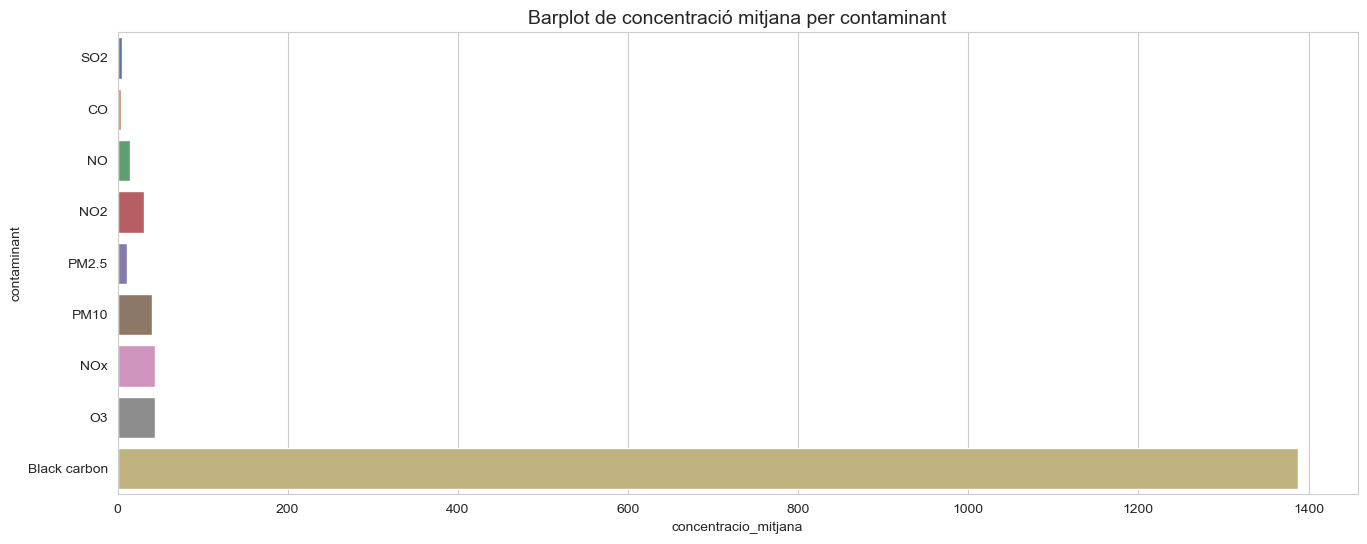

In [42]:
# Barplot de concentració mitjana de cada contaminant
dfPollutantI = dfPollutant.set_index('contaminant_codi')
filter = (dfPollutantI['estacio_codi'] == 999)
dfRowsFilter = dfPollutantI.loc[filter]

sns.set_style("whitegrid")
sns.set_palette('deep')
plt.figure(figsize =(16, 6))
sns.barplot(x='concentracio_mitjana', y='contaminant', data=dfRowsFilter, errorbar=None)
plt.title("Barplot de concentració mitjana per contaminant", fontsize=14)

De la gràfica s'observa clarament que el contaminant amb major concentració és el Black carbon, seguit del O3, NOx i PM10, mentre que el CO és el menys present a la ciutat.

Text(0.5, 1.0, 'Boxplot de concentració mitjana per contaminant')

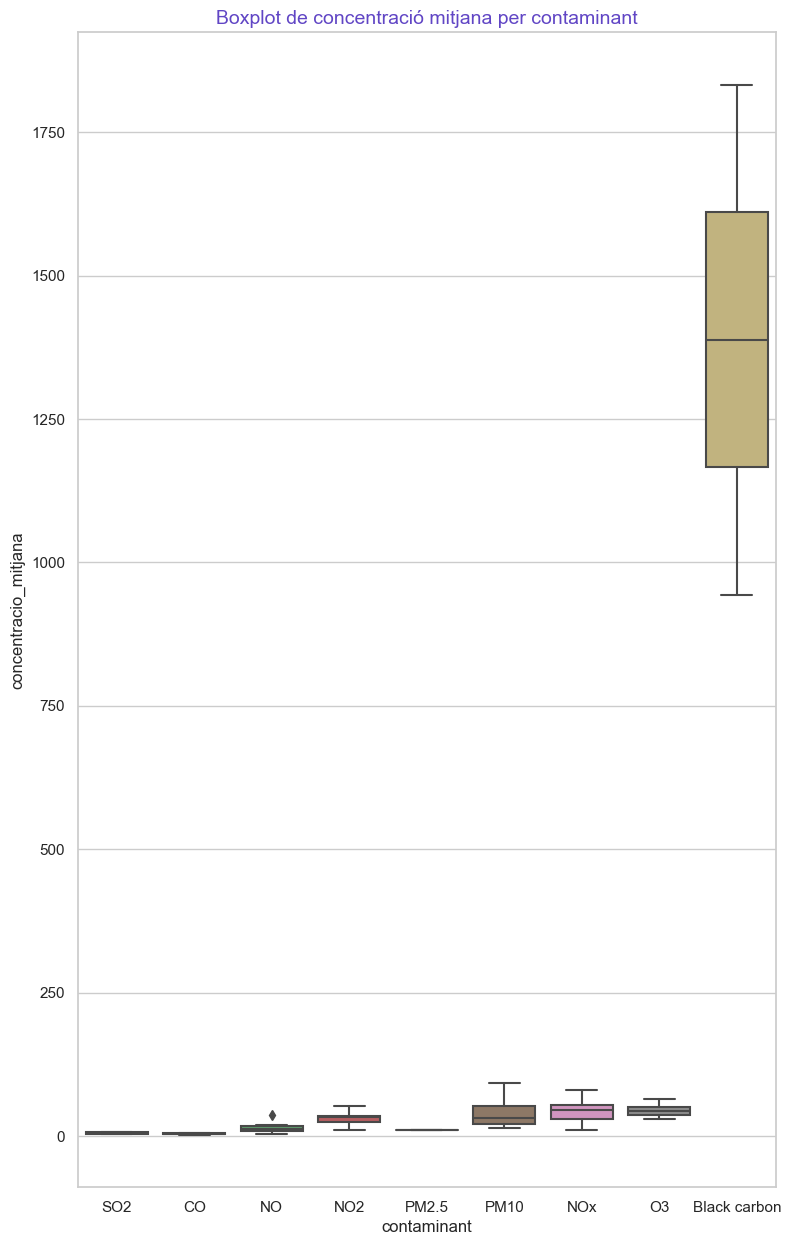

In [111]:
# Boxplot de concentració mitjana de cada contaminant
plt.figure(figsize =(9,15))
sns.set_style("whitegrid")
sns.boxplot(data=dfRowsFilter, y='concentracio_mitjana', x='contaminant')
plt.title("Boxplot de concentració mitjana per contaminant", fontsize=14, color="#6146C5", alpha=1)           

### 5.2.- Visualització de concentració mitjana per contaminant i estació


In [44]:
# Diagrama de barres agrupat per contaminant i estació
dfPollutantI = dfPollutant.set_index('contaminant_codi')
filter = (dfPollutantI['estacio_codi'] != 999)
dfRowsFilter = dfPollutantI.loc[filter]
dfRowsFilter.head(10)

,contaminant,estacio,estacio_codi,concentracio_mitjana
contaminant_codi,,,,
1,SO2,Eixample,43,4.40
1,SO2,Gràcia,44,6.16
1,SO2,Vall Hebron,54,7.37
1,SO2,Palau Reial,57,4.51
6,CO,Eixample,43,2.31
6,CO,Gràcia,44,4.30
6,CO,Vall Hebron,54,5.18
6,CO,Palau Reial,57,3.29
7,NO,Poblenou,4,16.48


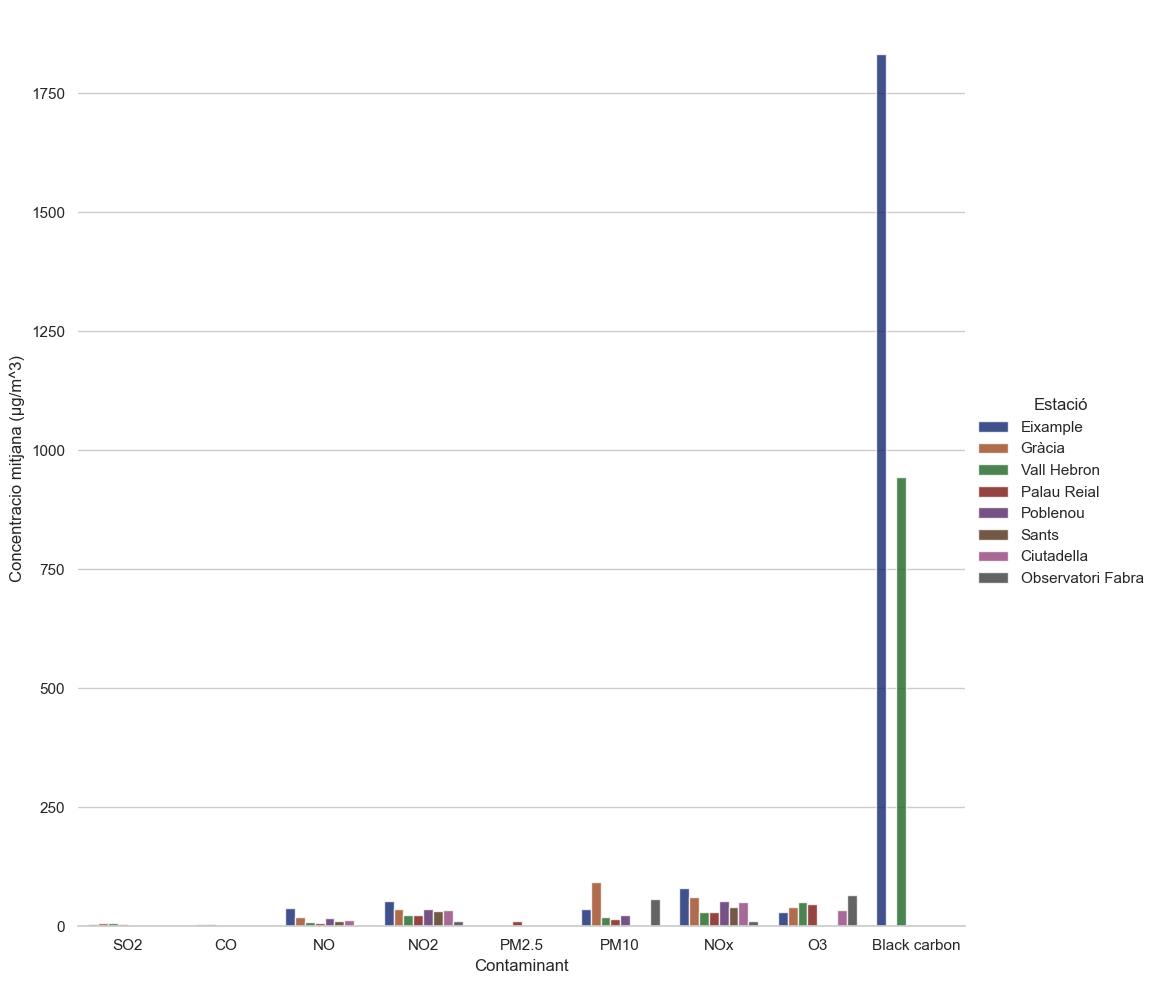

In [45]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=dfRowsFilter, kind="bar",
    x="contaminant", y="concentracio_mitjana", hue="estacio",
    errorbar=None, palette="dark", alpha=.8, height=10
)
g.despine(left=True)
g.set_axis_labels("Contaminant", "Concentracio mitjana (μg/m^3)")
g.legend.set_title("Estació")

De l'observació de la gràfica, el barri amb una major concentració de contaminants és l'Eixample, seguit de la Vall Hebron i Gràcia. L'estació "Observatori Fabra" és la que mesura menys agents contaminants.

### 5.3.- Visualització de "heatmap" de correlacions dels contaminants

In [46]:
dfPollutant.head()

,contaminant,contaminant_codi,estacio,estacio_codi,concentracio_mitjana
0,SO2,1,Eixample,43,4.40
1,SO2,1,Gràcia,44,6.16
2,SO2,1,Vall Hebron,54,7.37
3,SO2,1,Palau Reial,57,4.51
4,SO2,1,Totes,999,5.61


In [47]:
# Converteixo el dataframe en format ample (files a columnes)
dfHeatmap = dfPollutant.pivot(index='estacio', columns='contaminant', values='concentracio_mitjana')  
dfHeatmap

contaminant,Black carbon,CO,NO,NO2,NOx,O3,PM10,PM2.5,SO2
estacio,,,,,,,,,
Ciutadella,NaN,NaN,13.39,34.73,50.29,34.72,NaN,NaN,NaN
Eixample,1832.77,2.31,37.35,53.30,79.82,29.70,36.77,NaN,4.40
Gràcia,NaN,4.30,19.39,37.03,60.49,39.81,92.50,NaN,6.16
Observatori Fabra,NaN,NaN,3.30,10.02,10.52,65.13,57.13,NaN,NaN
Palau Reial,NaN,3.29,6.55,22.73,29.26,46.55,14.52,10.58,4.51
Poblenou,NaN,NaN,16.48,35.40,52.78,NaN,24.64,NaN,NaN
Sants,NaN,NaN,10.43,31.13,40.73,NaN,NaN,NaN,NaN
Totes,1388.22,3.77,14.50,31.04,44.18,44.49,40.77,10.58,5.61
Vall Hebron,943.67,5.18,9.08,23.99,29.54,51.04,19.06,NaN,7.37


In [48]:
# Elimino del dataframe la columna "PM2.5" perquè només té una mesura i la fila "Totes" que són valors calculats, no mesures   
dfHeatmap1 = dfHeatmap.drop(['PM2.5'], axis=1)
print(dfHeatmap1.drop(['Totes'],axis=0))

contaminant        Black carbon    CO     NO    NO2    NOx     O3   PM10   SO2
estacio                                                                       
Ciutadella                  NaN   NaN  13.39  34.73  50.29  34.72    NaN   NaN
Eixample                1832.77  2.31  37.35  53.30  79.82  29.70  36.77  4.40
Gràcia                      NaN  4.30  19.39  37.03  60.49  39.81  92.50  6.16
Observatori Fabra           NaN   NaN   3.30  10.02  10.52  65.13  57.13   NaN
Palau Reial                 NaN  3.29   6.55  22.73  29.26  46.55  14.52  4.51
Poblenou                    NaN   NaN  16.48  35.40  52.78    NaN  24.64   NaN
Sants                       NaN   NaN  10.43  31.13  40.73    NaN    NaN   NaN
Vall Hebron              943.67  5.18   9.08  23.99  29.54  51.04  19.06  7.37


<Axes: xlabel='contaminant', ylabel='contaminant'>

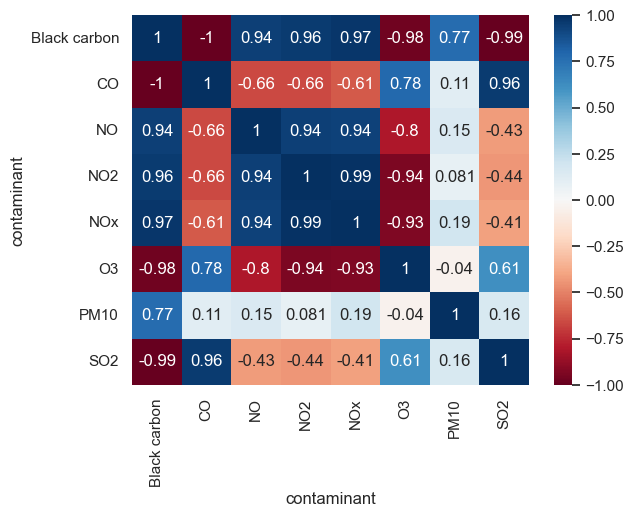

In [49]:
corr = dfHeatmap1.corr()   # Creació de matriu de correlació
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

A partir del heatmap es pot observar que el black carbon presenta una elevada correlació positiva amb els NOx, NO i NO2, mentre que les PM10 amb el O3 i NO2 tenen molt poca correlació. 

## 6.- Estudi d'anàlisis de les estacions de mesura 

### 6.1.- Comparativa de les estacions Eixample i Observatori Fabra (Test d'hipòtesis)
Estudi de la relació de les concentracions de contaminants de l'estació Eixample (nivell més elevat de pol·lució) i Observatori Fabra (menys contaminació) aplicant el Test d'hipòtesis.

In [50]:
dfPollutant.head()

,contaminant,contaminant_codi,estacio,estacio_codi,concentracio_mitjana
0,SO2,1,Eixample,43,4.40
1,SO2,1,Gràcia,44,6.16
2,SO2,1,Vall Hebron,54,7.37
3,SO2,1,Palau Reial,57,4.51
4,SO2,1,Totes,999,5.61


In [51]:
# Converteixo el dataframe en format ample (files a columnes)
dfHipT = dfPollutant.pivot(index='contaminant', columns='estacio', values='concentracio_mitjana')  
dfHipT

estacio,Ciutadella,Eixample,Gràcia,Observatori Fabra,Palau Reial,Poblenou,Sants,Totes,Vall Hebron
contaminant,,,,,,,,,
Black carbon,NaN,1832.77,NaN,NaN,NaN,NaN,NaN,1388.22,943.67
CO,NaN,2.31,4.30,NaN,3.29,NaN,NaN,3.77,5.18
NO,13.39,37.35,19.39,3.30,6.55,16.48,10.43,14.50,9.08
NO2,34.73,53.30,37.03,10.02,22.73,35.40,31.13,31.04,23.99
NOx,50.29,79.82,60.49,10.52,29.26,52.78,40.73,44.18,29.54
O3,34.72,29.70,39.81,65.13,46.55,NaN,NaN,44.49,51.04
PM10,NaN,36.77,92.50,57.13,14.52,24.64,NaN,40.77,19.06
PM2.5,NaN,NaN,NaN,NaN,10.58,NaN,NaN,10.58,NaN
SO2,NaN,4.40,6.16,NaN,4.51,NaN,NaN,5.61,7.37


In [52]:
# Elimino la columna 'Totes' perquè no són valors empírics, són calculats
dfHipT=dfHipT.drop('Totes', axis=1)
dfHipT

estacio,Ciutadella,Eixample,Gràcia,Observatori Fabra,Palau Reial,Poblenou,Sants,Vall Hebron
contaminant,,,,,,,,
Black carbon,NaN,1832.77,NaN,NaN,NaN,NaN,NaN,943.67
CO,NaN,2.31,4.30,NaN,3.29,NaN,NaN,5.18
NO,13.39,37.35,19.39,3.30,6.55,16.48,10.43,9.08
NO2,34.73,53.30,37.03,10.02,22.73,35.40,31.13,23.99
NOx,50.29,79.82,60.49,10.52,29.26,52.78,40.73,29.54
O3,34.72,29.70,39.81,65.13,46.55,NaN,NaN,51.04
PM10,NaN,36.77,92.50,57.13,14.52,24.64,NaN,19.06
PM2.5,NaN,NaN,NaN,NaN,10.58,NaN,NaN,NaN
SO2,NaN,4.40,6.16,NaN,4.51,NaN,NaN,7.37


In [53]:
dfHipT.isnull().sum()  

estacio
Ciutadella           5
Eixample             1
Gràcia               2
Observatori Fabra    4
Palau Reial          1
Poblenou             5
Sants                6
Vall Hebron          1
dtype: int64

In [54]:
# Imputació dels valors nuls amb el valor de la mitjana de cada fila

#from sklearn.impute import SimpleImputer   -> Està a l'inici en llibreries
#imputer = SimpleImputer(strategy='mean', axis=1)    La clase SimpleImputer de Scikit-learn no acepta axis=1 
#dfHipTImp = pd.DataFrame(imputer.fit_transform(dfHipT)) 
#dfHipTImp
# Us de la funció apply per aplicar la funció lambda que calcula
#la mitjana de cada fila i substitueix els valors nuls
dfHipTImp = dfHipT.apply(lambda x: x.fillna(x.mean()), axis=1) 
round(dfHipTImp,2)

estacio,Ciutadella,Eixample,Gràcia,Observatori Fabra,Palau Reial,Poblenou,Sants,Vall Hebron
contaminant,,,,,,,,
Black carbon,1388.22,1832.77,1388.22,1388.22,1388.22,1388.22,1388.22,943.67
CO,3.77,2.31,4.30,3.77,3.29,3.77,3.77,5.18
NO,13.39,37.35,19.39,3.30,6.55,16.48,10.43,9.08
NO2,34.73,53.30,37.03,10.02,22.73,35.40,31.13,23.99
NOx,50.29,79.82,60.49,10.52,29.26,52.78,40.73,29.54
O3,34.72,29.70,39.81,65.13,46.55,44.49,44.49,51.04
PM10,40.77,36.77,92.50,57.13,14.52,24.64,40.77,19.06
PM2.5,10.58,10.58,10.58,10.58,10.58,10.58,10.58,10.58
SO2,5.61,4.40,6.16,5.61,4.51,5.61,5.61,7.37


Aquest és el DataFrame que faré servir per aplicar el test d'hipòtesis

In [55]:
# Selecciono en el DataFrame les variables a comparar
dfHipT2 = dfHipTImp[['Eixample', 'Observatori Fabra']]
dfHipT2

estacio,Eixample,Observatori Fabra
contaminant,,
Black carbon,1832.77,1388.22
CO,2.31,3.77
NO,37.35,3.30
NO2,53.30,10.02
NOx,79.82,10.52
O3,29.70,65.13
PM10,36.77,57.13
PM2.5,10.58,10.58
SO2,4.40,5.61


Plantejo la hipòtesi que quanta més contaminació hi ha en el districte de l'Eixample (zona de màxima pol·lució), també més contaminació hi ha en la zona de l'Observatori Fabra (zona amb el mínim nivell de contaminació) ja que les dues àrees pertanyen a la ciutat de Barcelona. Així doncs la meva hipòtesi és:
- Hipòtesi nul·la, H0: les dues mostres són independents. No hi ha relació entre les concentracions mitjanes de les dues estacions.
- Hipòtesi alternativa, H1: existeix una dependència entre les dues mostres.

In [56]:
# Faig la prova de correlació de Pearson.
#from scipy.stats import pearsonr
data1 = dfHipT2["Eixample"]
data2 = dfHipT2["Observatori Fabra"]
stat, p = pearsonr(data1, data2)
print("stat = %.3f\np = %.3f" % (stat, p))
if p > 0.05:
   print('Probablement independent')
else:
   print('Probablement dependent')

stat = 0.998
p = 0.000
Probablement dependent


Conclusió:
Amb una probabilitat de 0 % (agafant un nivell de significança alfa de 5%) hi ha suficients garanties per descartar la hipòtesi nul·la i considerar que les dues variables són dependents. Puc concloure que les concentracions mesurades a l'estació Observatori Fabra estan directament relacionades amb les de l'Eixample.  

### 6.2.- Comparativa de totes les estacions de mesura (One-Way ANOVA)
Estudi d'anàlisis dels valors de concentració de contaminants de totes les estacions aplicant la prova One-Way ANOVA.

In [57]:
dfHipTImp

estacio,Ciutadella,Eixample,Gràcia,Observatori Fabra,Palau Reial,Poblenou,Sants,Vall Hebron
contaminant,,,,,,,,
Black carbon,1388.22,1832.77,1388.22,1388.22,1388.22,1388.220000,1388.220000,943.67
CO,3.77,2.31,4.30,3.77,3.29,3.770000,3.770000,5.18
NO,13.39,37.35,19.39,3.30,6.55,16.480000,10.430000,9.08
NO2,34.73,53.30,37.03,10.02,22.73,35.400000,31.130000,23.99
NOx,50.29,79.82,60.49,10.52,29.26,52.780000,40.730000,29.54
O3,34.72,29.70,39.81,65.13,46.55,44.491667,44.491667,51.04
PM10,40.77,36.77,92.50,57.13,14.52,24.640000,40.770000,19.06
PM2.5,10.58,10.58,10.58,10.58,10.58,10.580000,10.580000,10.58
SO2,5.61,4.40,6.16,5.61,4.51,5.610000,5.610000,7.37


La prova ANOVA unidireccional (també coneguda com "anàlisi de la variància") em permetrà determinar si hi ha una diferència estadísticament significativa entre els valors de totes les estacions.
L'ANOVA unidireccional té les hipòtesis nul·la i alternativa següents:
- H0 (hipòtesi nul·la): μ1 = μ2 = μ3 = … = μk (Implica que les mitjanes de totes les estacions són iguals)
- H1 (hipòtesi nul·la): afirma que hi haurà almenys una mitjana d'una estació diferent de la resta.

In [58]:
data1 = dfHipTImp["Ciutadella"]
data2 = dfHipTImp["Eixample"]
data3 = dfHipTImp["Gràcia"]
data4 = dfHipTImp["Observatori Fabra"]
data5 = dfHipTImp["Palau Reial"]
data6 = dfHipTImp["Poblenou"]
data7 = dfHipTImp["Sants"]
data8 = dfHipTImp["Vall Hebron"]

f_oneway(data1, data2, data3, data4, data5, data6, data7, data8)

F_onewayResult(statistic=0.037181094764697796, pvalue=0.9999302119677966)

El valor de p obtingut de l'anàlisi ANOVA no és significatiu (p > 0.05), per tant es confirma la hipòtesis nul·la. Això implica que hi ha proves suficients per concloure que no hi ha cap diferència significativa en les mitjanes de concentració dels contaminants entre totes les estacions de Barcelona.

## 7.- Predicció de la qualitat de l'aire usant Aprenentatge Automàtic


### 7.1.- Predicció de la concentració dels contaminants
Aplicació d'un model de regressió linial amb scikit-learn per predir la concentració dels diversos contaminants en funció de l'estació, el dia i l'hora.

In [144]:
dfAir
dfAirRg = dfAir[['estacio', 'codi_contaminant', 'dia', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08',
                'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
                'h22', 'h23', 'h24']]
dfAirRg.head(9)

,estacio,codi_contaminant,dia,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,4,7,1,24.0,28.0,20.0,9.0,13.0,14.0,7.0,10.0,5.0,10.0,11.0,12.0,11.0,5.0,7.0,3.0,2.0,3.0,5.0,37.0,51.0,54.0,40.0,26.0
1,4,7,2,12.0,13.0,13.0,9.0,5.0,7.0,11.0,31.0,56.0,61.0,41.0,50.0,48.0,46.0,48.0,31.0,23.0,12.0,15.0,22.0,29.0,26.0,97.0,65.0
2,4,7,3,68.0,31.0,31.0,24.0,20.0,16.0,26.0,51.0,63.0,67.0,64.0,79.0,66.0,43.0,NaN,NaN,11.0,6.0,19.0,6.0,3.0,2.0,2.0,1.0
3,4,7,4,1.0,1.0,1.0,2.0,3.0,7.0,16.0,33.0,54.0,72.0,46.0,33.0,18.0,14.0,12.0,12.0,16.0,17.0,16.0,26.0,69.0,36.0,16.0,22.0
4,4,7,5,22.0,9.0,5.0,4.0,8.0,6.0,11.0,36.0,52.0,84.0,88.0,55.0,26.0,23.0,24.0,19.0,6.0,3.0,2.0,6.0,33.0,73.0,13.0,7.0
5,4,7,6,1.0,2.0,1.0,2.0,2.0,1.0,4.0,6.0,10.0,13.0,14.0,12.0,9.0,7.0,4.0,2.0,1.0,2.0,21.0,51.0,68.0,63.0,49.0,37.0
6,4,7,7,29.0,31.0,19.0,5.0,1.0,2.0,4.0,7.0,12.0,18.0,30.0,4.0,3.0,3.0,4.0,3.0,2.0,2.0,1.0,1.0,1.0,4.0,6.0,20.0
7,4,7,8,16.0,14.0,30.0,8.0,2.0,2.0,1.0,3.0,2.0,16.0,7.0,7.0,7.0,7.0,13.0,3.0,12.0,23.0,9.0,21.0,30.0,22.0,11.0,2.0
8,4,7,9,13.0,9.0,3.0,2.0,1.0,2.0,3.0,1.0,3.0,5.0,4.0,5.0,4.0,3.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0


dfAirRg és el DataFrame que aplicaré la regressió linial per predir els valors de concentració.

In [60]:
dfAirRg.isnull().sum()  

estacio              0
codi_contaminant     0
dia                  0
h01                 63
h02                 17
h03                 17
h04                 17
h05                 17
h06                 17
h07                 17
h08                 17
h09                 17
h10                 46
h11                 72
h12                 89
h13                 61
h14                 71
h15                 62
h16                 51
h17                 26
h18                 13
h19                 12
h20                 11
h21                 12
h22                 12
h23                 12
h24                 13
dtype: int64

In [61]:
# Imputació dels valors nuls amb els valors de la mitjana de cada columna
simple = SimpleImputer().fit(dfAirRg)
mean = simple.transform(dfAirRg)    # És un array

dfAirRg = pd.DataFrame(mean, columns=['estacio', 'codi_contaminant', 'dia', 'h01', 'h02', 'h03', 'h04',
                                       'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13',
                                       'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21','h22',
                                       'h23', 'h24'])
dfAirRg.isnull().sum()  

estacio             0
codi_contaminant    0
dia                 0
h01                 0
h02                 0
h03                 0
h04                 0
h05                 0
h06                 0
h07                 0
h08                 0
h09                 0
h10                 0
h11                 0
h12                 0
h13                 0
h14                 0
h15                 0
h16                 0
h17                 0
h18                 0
h19                 0
h20                 0
h21                 0
h22                 0
h23                 0
h24                 0
dtype: int64

In [62]:
# Definició de variables entrades (X) i la variable objectiu/sortida (y)
X = dfAirRg.drop(columns='h24')
y = dfAirRg['h24']

# Divisió de les dades en conjunts train i test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
                                      X, y, train_size = .7, random_state = 1234, shuffle = True
                                    )

# Preprocessament de les dades: escalat estàndard
sc = StandardScaler()
X_trainSc = sc.fit_transform(X_train)    # És array
X_testSc = sc.transform(X_test)

print('Les mitjanes de X_train escalat:\n',X_testSc.mean(axis=0))
print('Les desviacions std de X_test:\n', X_testSc.std(axis=0))

Les mitjanes de X_train escalat:
 [ 0.01931899 -0.05021985 -0.02395266 -0.01688078 -0.01509285 -0.0151758
 -0.0085224  -0.0119732  -0.01000879 -0.00975934 -0.01766035 -0.02424023
 -0.01590964 -0.00724624 -0.00853861 -0.00971915 -0.00890649 -0.00933601
 -0.01769498 -0.02119195 -0.01994625 -0.01705435 -0.01586321 -0.0214303
 -0.02346712 -0.03037975]
Les desviacions std de X_test:
 [0.97212716 0.94556179 1.02541068 0.9532127  0.97524256 0.98076354
 1.00170071 0.99835223 1.00494816 1.00892839 1.0002443  0.97787957
 1.01050936 1.02566247 1.01850096 1.01300018 1.00942766 0.99817885
 0.98652443 0.98476265 0.98649513 0.99667286 1.0107752  0.9954784
 0.97830811 0.94987648]


Les dades escalades tenen una distribució normal amb una mitjana de 0 i una desviació estàndard igual a 1.


In [63]:
# Creació i ajust del model de regressió linial
lm = linear_model.LinearRegression()
model = lm.fit(X_trainSc, y_train)

# Prediccions de la variable sortida/resposta (h24) mesurada. 
predictions = lm.predict(X_testSc)
print('Les prediccions de les concentracions dels contaminants a 24:00h ("h24"):\n', predictions)

Les prediccions de les concentracions dels contaminants a 24:00h ("h24"):
 [ 1.72693619e+01  3.79448864e+01  6.54650528e+01  8.02390497e+02
  9.66407334e+00  7.50947062e+00  5.98943087e+00  1.84427010e+01
  1.47228538e+01  7.77871069e+00  1.32366361e+01  1.34700088e+01
  5.33628459e+00  1.22078362e+01  9.29556368e-01  8.34527071e+01
 -9.14219252e+00  3.86146554e+02  5.89935526e+01  3.76469725e+03
  7.63395532e+00  1.13357474e+01  3.55198936e+00  1.56979237e+00
  1.60970964e+03  6.80739196e+01  3.70634118e+01 -1.20710606e+00
  1.08705126e+03  3.74275902e+02  1.77009618e+00  1.70230630e-01
  3.27408620e+01 -7.98147949e+00  5.63868409e+00  1.43331732e+02
  5.02071599e+01  4.20959150e+02  3.39275171e+01  4.26262520e+00
  1.09219926e+03  2.29425147e+00  3.83527406e+00 -8.70058306e-01
  3.85661395e+03  2.47807703e+01  1.06056340e+03  1.57803875e+03
  1.68214740e+00  2.58995302e+01  1.40485280e+02  4.34014482e+01
  4.97854114e+03  7.41687855e+00  6.85122324e+00  9.73147711e+00
  2.33649982e+0

In [64]:
# Avaluació del model de regressió linial

print(f"MSE: {round(mean_squared_error(y_test, predictions),4)}")
print(f"RMSE: {round(math.sqrt(mean_squared_error(y_test, predictions)),4)}")

rSq = model.score(X_trainSc, y_train)
print(f"R^2: {round(rSq,4)}")

MSE: 23535.371
RMSE: 153.4124
R^2: 0.995


El valor de R Square (R^2) indica que el model amb SKLearn presenta un molt bon ajust entre la resposta predita i el valor real.

Aquest model de regressió linial amb SKLearn es pot aplicar a noves dades per predir valors de concentració dels contaminants, com es pot veure en els dos casos de sota.

In [65]:
# Predicció de la concentració de contaminant NO (7) a l'estació Poblenou (4) a les 24:00 h
arrayXNew = np.random.randint(low=0, high=20, size=(1, 26))   # low i high són les concentracions mín i max extretes dels diagrames  
arrayXNew[0,0] =  4
arrayXNew[0, 1] = 7   
print("Les dades noves són:\n",arrayXNew)

X_testScNew = sc.transform(arrayXNew)
prediction = lm.predict(X_testScNew)
print('Predicció de la concentració de NO a estació Poblenou a 24:00h:', prediction)

Les dades noves són:
 [[ 4  7 16  2  6 16  1  9 13 14  3  9  2  7  8  8 13  7 14  4  7  9  2  4
   2 10]]
Predicció de la concentració de NO a estació Poblenou a 24:00h: [16.81058357]


In [66]:
# Predicció de la concentració de contaminant O3 (14) a l'estació Eixample (43) a les 24:00 h
arrayXNew = np.random.randint(low=25, high=70, size=(1, 26))   # low i high són les concentracions mín i max extretes dels diagrames  
arrayXNew[0,0] =  43
arrayXNew[0, 1] = 14   
print("Les dades noves són:\n",arrayXNew)

X_testScNew = sc.transform(arrayXNew)
prediction = lm.predict(X_testScNew)
print('Predicció de la concentració de O3 a estació Eixample a 24:00h:', prediction)

Les dades noves són:
 [[43 14 60 56 65 43 39 59 41 29 43 31 51 68 44 45 54 42 28 43 25 41 63 27
  45 48]]
Predicció de la concentració de O3 a estació Eixample a 24:00h: [5.68977416]


### 7.2.- Predicció de la qualitat de l'aire
Aplicació del model de classificació KNN per predir la qualitat de l'aire, classificant-la en 'bona', 'moderada', 'mala' o 'perillosa', en funció dels valors de concentració dels contaminants mesurats.

Prenc la variable 'h21' per classificar-la en quatre grups ja que observant el Dataframe inicial és l'hora que presenta en principi un nivell d'exposició més elevat.

Codi de la qualitat de l'aire: 0-Bona, 1-Moderada, 2-Mala, 3-Perillosa 

In [132]:
dfAir
dfAirKnn = dfAir[['codi_contaminant', 'dia', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08',
                'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
                'h22', 'h23', 'h24']]
dfAirKnn.head()   

,codi_contaminant,dia,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,7,1,24.0,28.0,20.0,9.0,13.0,14.0,7.0,10.0,5.0,10.0,11.0,12.0,11.0,5.0,7.0,3.0,2.0,3.0,5.0,37.0,51.0,54.0,40.0,26.0
1,7,2,12.0,13.0,13.0,9.0,5.0,7.0,11.0,31.0,56.0,61.0,41.0,50.0,48.0,46.0,48.0,31.0,23.0,12.0,15.0,22.0,29.0,26.0,97.0,65.0
2,7,3,68.0,31.0,31.0,24.0,20.0,16.0,26.0,51.0,63.0,67.0,64.0,79.0,66.0,43.0,NaN,NaN,11.0,6.0,19.0,6.0,3.0,2.0,2.0,1.0
3,7,4,1.0,1.0,1.0,2.0,3.0,7.0,16.0,33.0,54.0,72.0,46.0,33.0,18.0,14.0,12.0,12.0,16.0,17.0,16.0,26.0,69.0,36.0,16.0,22.0
4,7,5,22.0,9.0,5.0,4.0,8.0,6.0,11.0,36.0,52.0,84.0,88.0,55.0,26.0,23.0,24.0,19.0,6.0,3.0,2.0,6.0,33.0,73.0,13.0,7.0


dfAirKnn és el DataFrame que usaré per fer aquest apartat.

In [134]:
# Imputació dels valors nuls amb els valors de la mitjana de cada columna
simple = SimpleImputer().fit(dfAirKnn)
arrayMean = simple.transform(dfAirKnn)   

dfAirKnn = pd.DataFrame(arrayMean, columns=['codi_contaminant', 'dia', 'h01', 'h02', 'h03', 'h04',
                                            'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13',
                                            'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21','h22',
                                            'h23', 'h24'
                                           ]
                       )
dfAirKnn.isnull().sum()  

codi_contaminant    0
dia                 0
h01                 0
h02                 0
h03                 0
h04                 0
h05                 0
h06                 0
h07                 0
h08                 0
h09                 0
h10                 0
h11                 0
h12                 0
h13                 0
h14                 0
h15                 0
h16                 0
h17                 0
h18                 0
h19                 0
h20                 0
h21                 0
h22                 0
h23                 0
h24                 0
dtype: int64

In [135]:
# Preprocessament de les dades per a la classificació
# Creo els contenidors per transformor els valors continus de 'h21' en quatre categories i els assigno a 'h21Cat' 
dfAirKnn['h21Cat'] = pd.qcut(dfAirKnn["h21"], 4, retbins=False, labels=[1, 2, 3, 4])
y = dfAirKnn['h21Cat']
X = dfAirKnn.drop(['h21','h21Cat'], axis = 1)

In [136]:
X.head()

,codi_contaminant,dia,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h22,h23,h24
0,7.0,1.0,24.0,28.0,20.0,9.0,13.0,14.0,7.0,10.0,5.0,10.0,11.0,12.0,11.0,5.0,7.000000,3.000000,2.0,3.0,5.0,37.0,54.0,40.0,26.0
1,7.0,2.0,12.0,13.0,13.0,9.0,5.0,7.0,11.0,31.0,56.0,61.0,41.0,50.0,48.0,46.0,48.000000,31.000000,23.0,12.0,15.0,22.0,26.0,97.0,65.0
2,7.0,3.0,68.0,31.0,31.0,24.0,20.0,16.0,26.0,51.0,63.0,67.0,64.0,79.0,66.0,43.0,365.250497,367.122108,11.0,6.0,19.0,6.0,2.0,2.0,1.0
3,7.0,4.0,1.0,1.0,1.0,2.0,3.0,7.0,16.0,33.0,54.0,72.0,46.0,33.0,18.0,14.0,12.000000,12.000000,16.0,17.0,16.0,26.0,36.0,16.0,22.0
4,7.0,5.0,22.0,9.0,5.0,4.0,8.0,6.0,11.0,36.0,52.0,84.0,88.0,55.0,26.0,23.0,24.000000,19.000000,6.0,3.0,2.0,6.0,73.0,13.0,7.0


In [137]:
# Divisió de dades en conjunts train i test
X_train, X_test, y_train, y_test = train_test_split(
                                      X, y, train_size = .7, random_state = 1234, shuffle = True
                                    )

In [139]:
# Escalat estàndard de característiques per a la classificació
sc = StandardScaler()
X_trainSc = sc.fit_transform(X_train)    # És array
X_testSc = sc.transform(X_test)

In [143]:
# Entrenament i predicció de les classes de dades test
classifier = KNeighborsClassifier()   # No hi ha cap argument, usarà 5 veïns per defecte 
classifier.fit(X_trainSc, y_train)

y_predictions = classifier.predict(X_testSc)
print("Les prediccions de les classes de 'h21' són:\n", y_predictions)

Les prediccions de les classes de 'h21' són:
 [3 3 3 4 2 2 1 3 2 3 2 3 1 2 1 3 2 4 3 4 1 3 1 2 4 3 3 1 4 4 1 1 3 1 1 2 4
 4 4 3 4 1 1 3 4 3 4 4 1 1 2 1 4 3 1 4 1 4 3 2 4 1 3 2 3 4 3 1 3 1 4 1 4 4
 2 2 3 4 1 3 1 4 3 1 4 2 1 3 1 2 1 1 3 1 1 2 3 2 3 4 4 3 2 1 2 3 2 4 4 4 2
 1 1 3 3 3 3 3 2 3 2 3 1 3 2 3 2 1 3 4 1 1 1 3 4 4 2 1 2 1 1 2 2 2 2 1 1 4
 2 2 1 3 3 2 1 2 1 1 1 1 1 1 1 1 4 2 4 2 4 3 1 4 3 1 1 1 3 3 4 2 3 2 1 1 4
 1 4 2 2 1 4 1 2 2 1 1 4 1 3 3 3 1 1 1 4 1 1 1 2 4 1 4 4 4 3 3 2 1 2 1 2 2
 3 4 4 4 2 1 2 1 4 1 4 2 4 1 2 1 3 3 4 3 2 3 4 1 1 4 2 1 1 2 1 1 2 1 1 3 1
 4 2 4 2 1 4 1 2 4 3 1 3 2 2 3 2 1 4 2 1 3 3 4 2 4 3 4 4 1 2 4 1 3 3 3 2 4
 3 1 3 2 1 3 4 3 1 2 3 4 4 2 1 1 3 4 4 4 2 3 3 1 4 2 2 2 3 3 1 3 2 1 3 1 4
 1 1 1 3 1 1 3 1 2 4 2 3 1 3 1 1 4 4 2 1 3 2 1 4 2 1 3 1 2 4 3 3 2 2 1 1 1
 3 1 2 1 1 3 1 1 3 3 3 1 1 1 2 2 1 2 2 1 3 2 1 3 3 2 4 3 2 1 1 2 1 2 3 3 2
 1 3 3 1 3 3 2 2 3 1 3 1 3 1 4 1 1 4 2 3 1 1 4 2 1 1 3 3 2 2 1 4 3 1 3 1 3
 2 1 4 3 2 4 3 1 1 2 3 2 3 4 1 4 1 3 1 4 2 2 2 1 2 1 4

In [150]:
y # = dfAirKnn['h21Cat']

0       3
1       3
2       1
3       4
4       3
       ..
2010    4
2011    4
2012    4
2013    4
2014    4
Name: h21Cat, Length: 2015, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [151]:
y_test

1148    3
183     4
1986    3
1184    4
21      2
       ..
328     2
982     1
1612    1
1334    2
228     1
Name: h21Cat, Length: 605, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [157]:
# Avaluació del classificador KNN

# Càlcul de accuracy 
acc =  classifier.score(X_testSc, y_test)
print(acc) 

0.7041322314049587


La puntuació del accuracy del meu classificador és del 70,4%, és a dir, que ha encertat el 70,4% de les classes.

              precision    recall  f1-score   support

           1       0.74      0.83      0.78       178
           2       0.56      0.54      0.55       147
           3       0.64      0.65      0.65       147
           4       0.89      0.77      0.83       133

    accuracy                           0.70       605
   macro avg       0.71      0.70      0.70       605
weighted avg       0.71      0.70      0.70       605



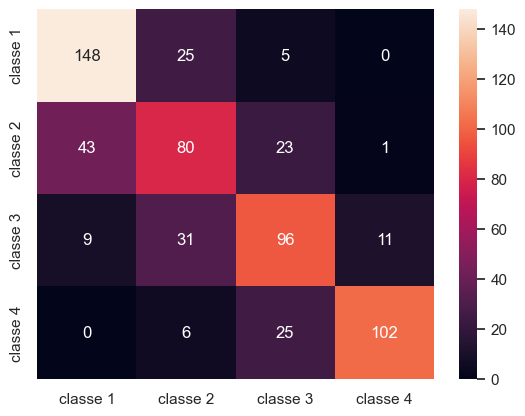

In [161]:
# Determinació d'altres paràmetres d'avaluació (confusion matrix, precision, recall i F1 score)
# Nomeno les 4 classes  
classes_names = ['classe 1','classe 2','classe 3', 'classe 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_predictions), 
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_predictions))

En la taula es pot observar els resultats d'avaluació per a cadascuna de les 4 classes. Respecte la precisió, la classe 4 presenta la màxima puntuació, seguida de la 1, la 3 i la darrera la 2, que té la precisió mínima.
De l'observació de la matriu de confusió, cal destacar: la classe 1 es va confondre en 25 casos amb la 2; la classe 2, en 43 registres amb la 1 i 23 casos amb la 3; la classe 3, 31 entrades amb la 2 i 11 amb la 4; i la classe 4, 25 casos amb la 3.   

## 8.- Proposta de mesures per millorar la qualitat de l'aire a Barcelona

A partir dels resultats obtinguts de l'anàlisi del conjunt de dades i conèixer els contaminants i les àrees amb nivells de po·lució més elevats, proposo que les mesures a implantar per les administracions públiques han de dirigir-se al trànsit (reducció de trànsit rodat de la ciutat, millora i promoció del transport públic...) i a les zones de l'Eixample, Gràcia i Vall Hebron. 